In [1]:
from torchvision import datasets
from torchvision import transforms
import random
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
random.seed(123)
# set transformation
transform = T.Compose([T.ToTensor(),T.Normalize((0.5,), (0.5,))])

dataset = datasets.MNIST(
root="~/data",
train=True,
download=True,
transform=transform
)

testdata = datasets.MNIST(
root="~/data",
train=False,
download=True,
transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.27MB/s]


Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]


Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.05MB/s]

Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw



In [5]:
classes = dataset.classes

class_count = {}
for _, index in dataset:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'5 - five': 5421,
 '0 - zero': 5923,
 '4 - four': 5842,
 '1 - one': 6742,
 '9 - nine': 5949,
 '2 - two': 5958,
 '3 - three': 6131,
 '6 - six': 5918,
 '7 - seven': 6265,
 '8 - eight': 5851}

In [6]:
from sklearn.model_selection import train_test_split
random_state = 42 #for reproductible results
train_indices, val_indices = train_test_split(list(range(len(dataset.targets))),
                                              train_size=100,
                                              stratify=dataset.targets,
                                              random_state=random_state)

In [7]:
trainset = torch.utils.data.Subset(dataset, train_indices)
valset = torch.utils.data.Subset(dataset, val_indices)

In [ ]:
class_count_train = {}
for i in range(100):
    label = trainset[i][1]
    if label not in class_count_train:
        class_count_train[label] = 0
    class_count_train[label]+=1
class_count_train

Text(0.5, 1.0, 'Répartition des classes')

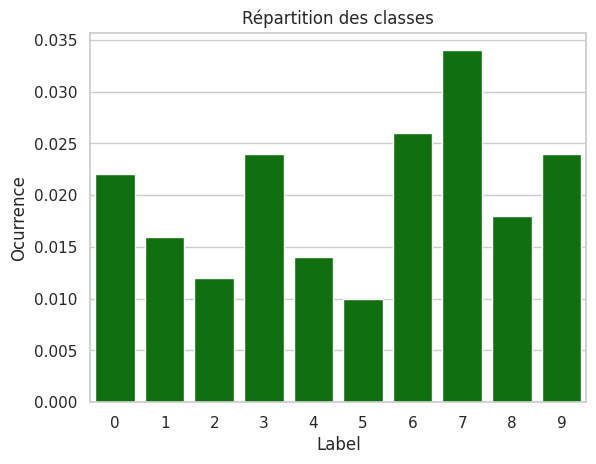

In [9]:
df=pd.DataFrame(class_count_train.items(),columns=["Label","Ocurrence"])
df["Ocurrence"]=(df["Ocurrence"]/len(trainset))*100
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(x="Label",y="Ocurrence",data=df,color="green")
plt.title('Répartition des classes')

La répartition ici n'est pas uniforme

In [11]:
#creer un dataset de taille 50000
data_cropped0_ind=[index for index in range(60000) if dataset[index][1]==0][:5000]
data_cropped1_ind=[index for index in range(60000) if dataset[index][1]==1][:5000]
data_cropped2_ind=[index for index in range(60000) if dataset[index][1]==2][:5000]
data_cropped3_ind=[index for index in range(60000) if dataset[index][1]==3][:5000]
data_cropped4_ind=[index for index in range(60000) if dataset[index][1]==4][:5000]
data_cropped5_ind=[index for index in range(60000) if dataset[index][1]==5][:5000]
data_cropped6_ind=[index for index in range(60000) if dataset[index][1]==6][:5000]
data_cropped7_ind=[index for index in range(60000) if dataset[index][1]==7][:5000]
data_cropped8_ind=[index for index in range(60000) if dataset[index][1]==8][:5000]
data_cropped9_ind=[index for index in range(60000) if dataset[index][1]==9][:5000]

In [12]:
cropped_indexes=data_cropped0_ind+data_cropped1_ind+data_cropped2_ind+data_cropped3_ind+data_cropped4_ind+data_cropped5_ind+data_cropped6_ind+data_cropped7_ind+data_cropped8_ind+data_cropped9_ind
remaining_indexes=[index for index in range(60000) if index not in cropped_indexes]

print(len(cropped_indexes))
print(len(remaining_indexes))

50000
10000


In [13]:
data_set_cropped=torch.utils.data.Subset(dataset,cropped_indexes)
data_set_remaining=torch.utils.data.Subset(dataset,remaining_indexes)

In [14]:
random_state=40
train_indices, val_indices = train_test_split(list(range(len([tuple[1] for tuple in data_set_cropped]))),
                                              train_size=100,
                                              stratify=[tuple[1] for tuple in data_set_cropped],
                                              random_state=random_state,
                                              shuffle=True)

In [15]:
trainset=torch.utils.data.Subset(data_set_cropped,train_indices)
valset=torch.utils.data.ConcatDataset([torch.utils.data.Subset(data_set_cropped,val_indices),data_set_remaining])

In [17]:
class_count_train2 = {}
for i in range(100):
    label = trainset[i][1]
    if label not in class_count_train2:
        class_count_train2[label] = 0
    class_count_train2[label]+=1
class_count_train2

{7: 10, 4: 10, 0: 10, 1: 10, 3: 10, 9: 10, 8: 10, 6: 10, 5: 10, 2: 10}

Text(0.5, 1.0, 'Répartition des classes')

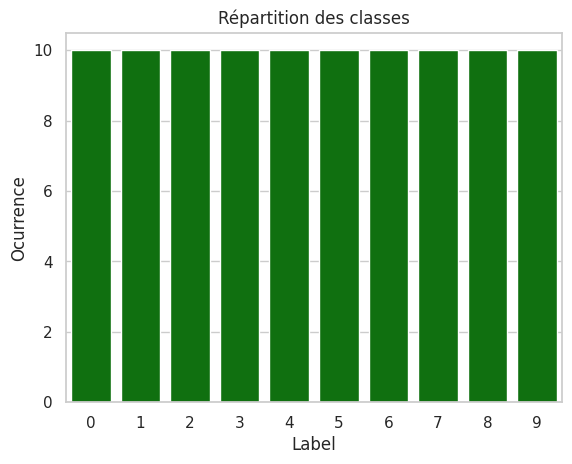

In [18]:
df=pd.DataFrame(class_count_train2.items(),columns=["Label","Ocurrence"])
df["Ocurrence"]=(df["Ocurrence"]/len(trainset))*100
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(x="Label",y="Ocurrence",data=df,color="green")
plt.title('Répartition des classes')

C'est mieux

In [19]:
class_count_val= {}
for i in range(59900):
    label = valset[i][1]
    if label not in class_count_val:
        class_count_val[label] = 0
    class_count_val[label] +=1
class_count_val

{4: 5832,
 1: 6732,
 6: 5908,
 3: 6121,
 5: 5411,
 8: 5841,
 9: 5939,
 2: 5948,
 0: 5913,
 7: 6255}

In [20]:
batch_size=64
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
unlabelled_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

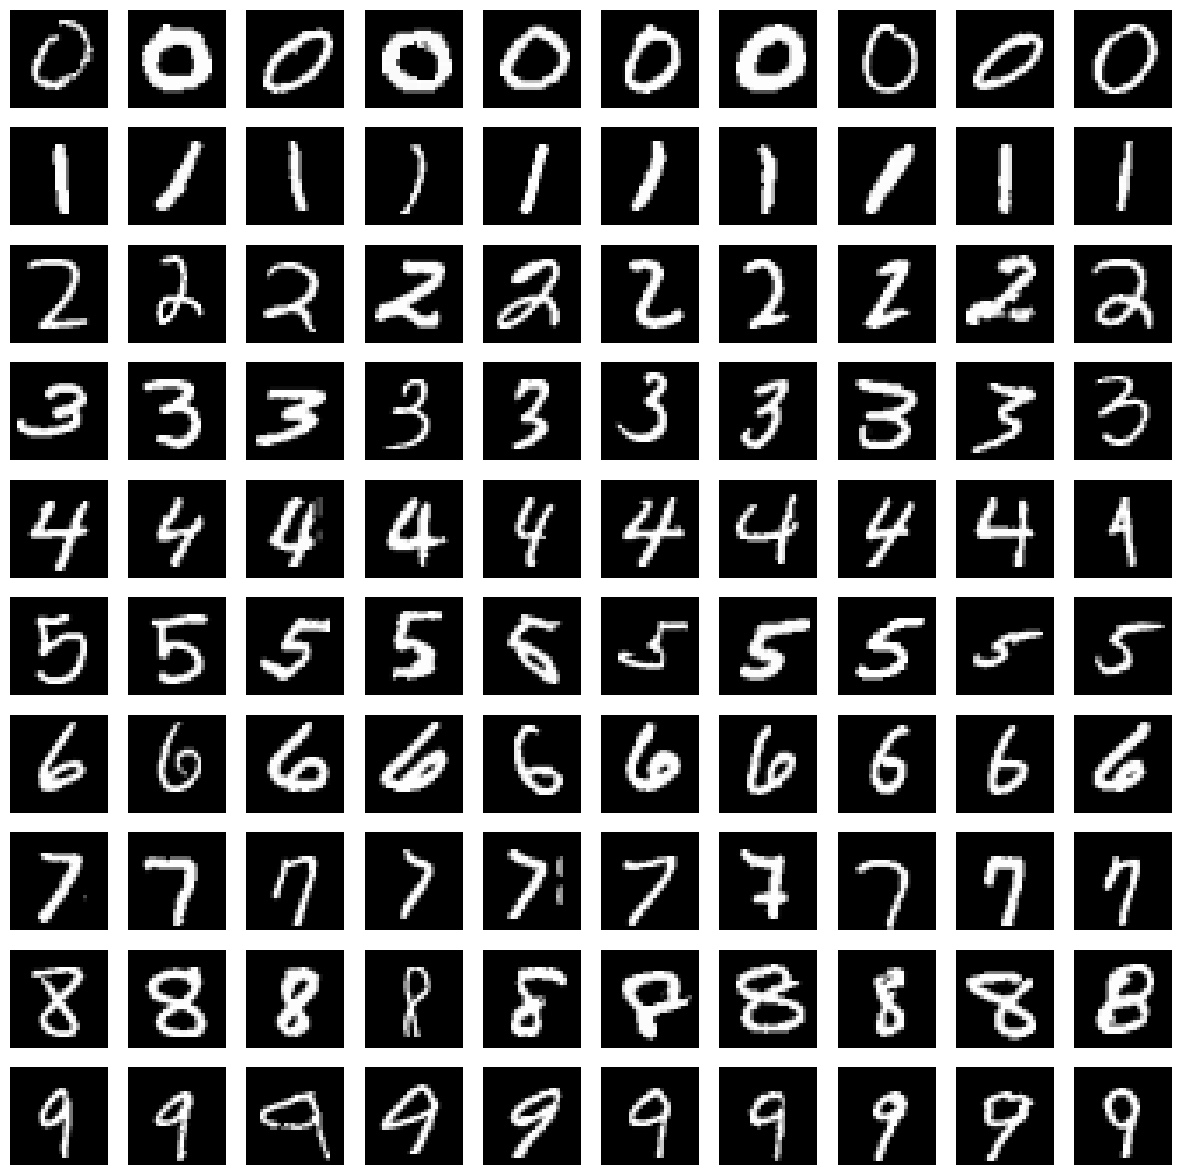

In [21]:
import torch
import torchvision

# Function to plot all images for each class
def plot_all_images_per_class(data_loader):
    class_images = {i: [] for i in range(10)}  #10 classes for MNIST

    for images, labels in data_loader:
        for i in range(len(labels)):
            label = int(labels[i])
            class_images[label].append(images[i][0].numpy())  #images are grayscale

    # Plot images
    fig, axs = plt.subplots(10, 10, figsize=(15, 15))
    for i in range(10):
        for j in range(10):
            ax = axs[i, j]
            ax.imshow(class_images[i][j], cmap='gray')
            ax.axis('off')

    plt.show()

plot_all_images_per_class(train_loader)